In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('state.csv')
df.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


## Mean
The sum of all values divided by the number of values.
### Synonym
average

## Weighted mean
The sum of all values times a weight divided by the sum of the weights.
### Synonym
weighted average

## Median
The value such that one-half of the data lies above and below.
### Synonym
50th percentile

## Percentile
The value such that P percent of the data lies below.
### Synonym
quantile

## Weighted median
The value such that one-half of the sum of the weights lies above and below the sorted data.

## Trimmed mean
The average of all values after dropping a fixed number of extreme values.
### Synonym
truncated mean

## Robust
Not sensitive to extreme values.
### Synonym
resistant

## Outlier
A data value that is very different from most of the data.
### Synonym
extreme value


## Deviations
The difference between the observed values and the estimate of location.
### Synonyms
errors, residuals
## Variance
The sum of squared deviations from the mean divided by n – 1 where n is the
number of data values.
### Synonym
mean-squared-error
## Standard deviation
The square root of the variance.
## Mean absolute deviation
The mean of the absolute values of the deviations from the mean.
### Synonyms
l1-norm, Manhattan norm
### Median absolute deviation from the median
The median of the absolute values of the deviations from the median.
## Range
The difference between the largest and the smallest value in a data set.
### Order statistics
Metrics based on the data values sorted from smallest to biggest.
### Synonym
ranks
## Percentile
The value such that P percent of the values take on this value or less and (100–P)
percent take on this value or more.
### Synonym
quantile
## Interquartile range
The difference between the 75th percentile and the 25th percentile.
### synonym
IQR

In [3]:
state = pd.read_csv('state.csv')
state['Population'].mean()
# trim_mean(state['Population'], 0.1)
state['Population'].median()

2838.5

In [4]:
np.average(state['Murder'], weights=state['Population'])


8.685042930280094

In [5]:
state['Population'].std()


4464.491433385835

In [6]:
iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 3889.0


### Boxplot
A plot introduced by Tukey as a quick way to visualize the distribution of data.
Synonym
box and whiskers plot
### Frequency table
A tally of the count of numeric data values that fall into a set of intervals (bins).
### Histogram
A plot of the frequency table with the bins on the x-axis and the count (or pro‐
portion) on the y-axis. While visually similar, bar charts should not be confused
with histograms. See “Exploring Binary and Categorical Data” on page 27 for a
discussion of the difference.
### Density plot
A smoothed version of the histogram, often based on a kernel density estimate

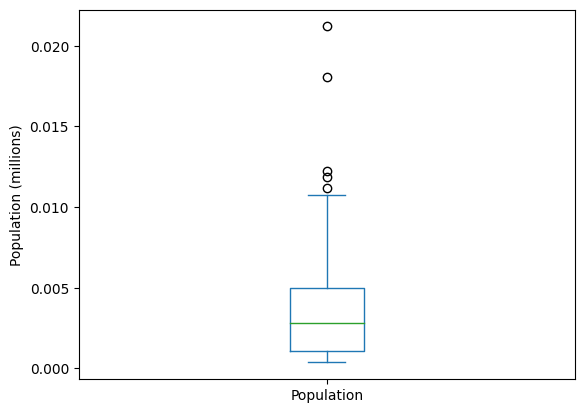

In [7]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')
plt.show()

# Frequency Tables and Histograms


In [8]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(344.167, 2448.3]     22
(2448.3, 4531.6]      12
(4531.6, 6614.9]       7
(10781.5, 12864.8]     3
(6614.9, 8698.2]       2
(8698.2, 10781.5]      2
(17031.4, 19114.7]     1
(19114.7, 21198.0]     1
(12864.8, 14948.1]     0
(14948.1, 17031.4]     0
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


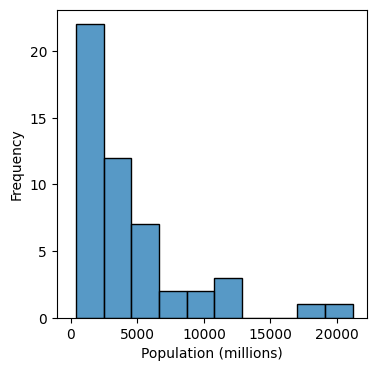

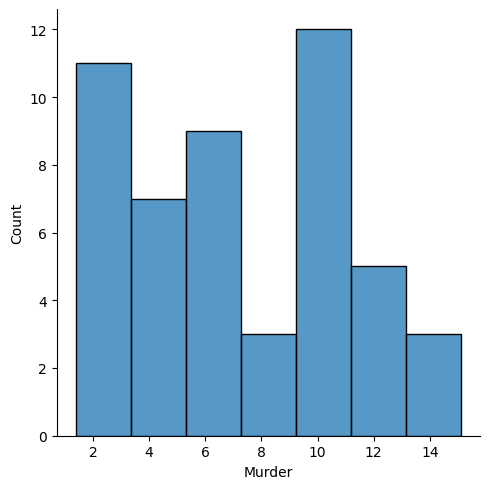

In [12]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
sns.histplot(df,x='Population')
sns.displot(df,x='Murder')
plt.show()

 # Density Plots and Estimates
Related to the histogram is a density plot which is shows the distribution of the data values as a continuous line .
*  A density plot can be thought of as a smoothed histogram ,although it is typically computed directly from the data through a *kernal density function estimate*

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Murder Rate (per 100,000)')

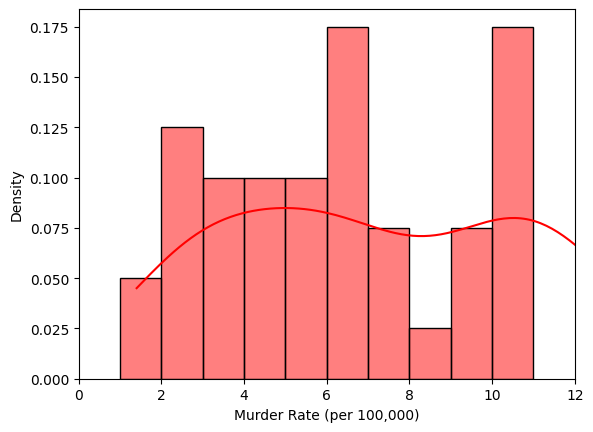

In [17]:
sns.histplot(state['Murder'], kde=True, bins=range(1, 12), stat="density", color='red')
plt.xlim(0, 12)

# Set the x-axis label
plt.xlabel('Murder Rate (per 100,000)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

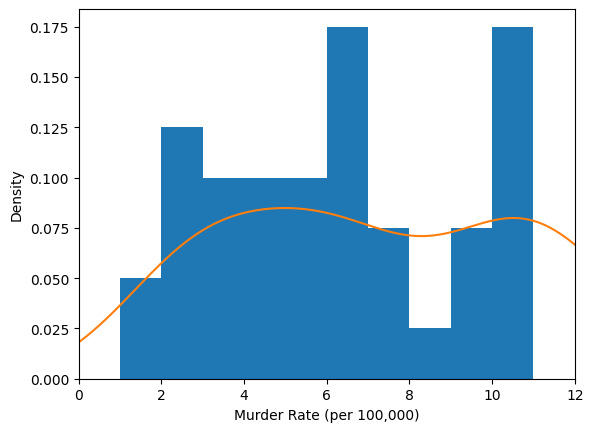

In [12]:
ax = state['Murder'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Mode
The most commonly occurring category or value in a data set.

## Expected value
When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.

## Bar charts
The frequency or proportion for each category plotted as bars.

## Pie charts
The frequency or proportion for each category plotted as wedges in a pie.


In [23]:
n = []
m = []

for i in df.columns:
    if df[i].dtype == 'object':
        n.append(i)
    else:
        m.append(i)


In [24]:
dfw_transposed = df[m].transpose().reset_index()
dfw_transposed

,index,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,Population,3615.0000,365.00,2212.0000,2110.0000,21198.0000,2541.0000,3100.0000,579.0000,8277.0000,...,681.0000,4173.0000,12237.0000,1203.0000,472.0000,4981.0000,3559.0000,1799.0000,4589.0000,376.0000
1,Income,3624.0000,6315.00,4530.0000,3378.0000,5114.0000,4884.0000,5348.0000,4809.0000,4815.0000,...,4167.0000,3821.0000,4188.0000,4022.0000,3907.0000,4701.0000,4864.0000,3617.0000,4468.0000,4566.0000
2,Illiteracy,2.1000,1.50,1.8000,1.9000,1.1000,0.7000,1.1000,0.9000,1.3000,...,0.5000,1.7000,2.2000,0.6000,0.6000,1.4000,0.6000,1.4000,0.7000,0.6000
3,Life.Exp,69.0500,69.31,70.5500,70.6600,71.7100,72.0600,72.4800,70.0600,70.6600,...,72.0800,70.1100,70.9000,72.9000,71.6400,70.0800,71.7200,69.4800,72.4800,70.2900
4,Murder,15.1000,11.30,7.8000,10.1000,10.3000,6.8000,3.1000,6.2000,10.7000,...,1.7000,11.0000,12.2000,4.5000,5.5000,9.5000,4.3000,6.7000,3.0000,6.9000
5,HS.Grad,41.3000,66.70,58.1000,39.9000,62.6000,63.9000,56.0000,54.6000,52.6000,...,53.3000,41.8000,47.4000,67.3000,57.1000,47.8000,63.5000,41.6000,54.5000,62.9000
6,Frost,20.0000,152.00,15.0000,65.0000,20.0000,166.0000,139.0000,103.0000,11.0000,...,172.0000,70.0000,35.0000,137.0000,168.0000,85.0000,32.0000,100.0000,149.0000,173.0000
7,Area,50708.0000,566432.00,113417.0000,51945.0000,156361.0000,103766.0000,4862.0000,1982.0000,54090.0000,...,75955.0000,41328.0000,262134.0000,82096.0000,9267.0000,39780.0000,66570.0000,24070.0000,54464.0000,97203.0000
8,state.area,51609.0000,589757.00,113909.0000,53104.0000,158693.0000,104247.0000,5009.0000,2057.0000,58560.0000,...,77047.0000,42244.0000,267339.0000,84916.0000,9609.0000,40815.0000,68192.0000,24181.0000,56154.0000,97914.0000
9,x,-86.7509,-127.25,-111.6250,-92.2992,-119.7730,-105.5130,-72.3573,-74.9841,-81.6850,...,-99.7238,-86.4560,-98.7857,-111.3300,-72.5450,-78.2005,-119.7460,-80.6665,-89.9941,-107.2560


In [25]:
dfw_melted = dfw_transposed.melt(id_vars='index', var_name='Cause of delay', value_name='Count')


Text(0, 0.5, 'Count')

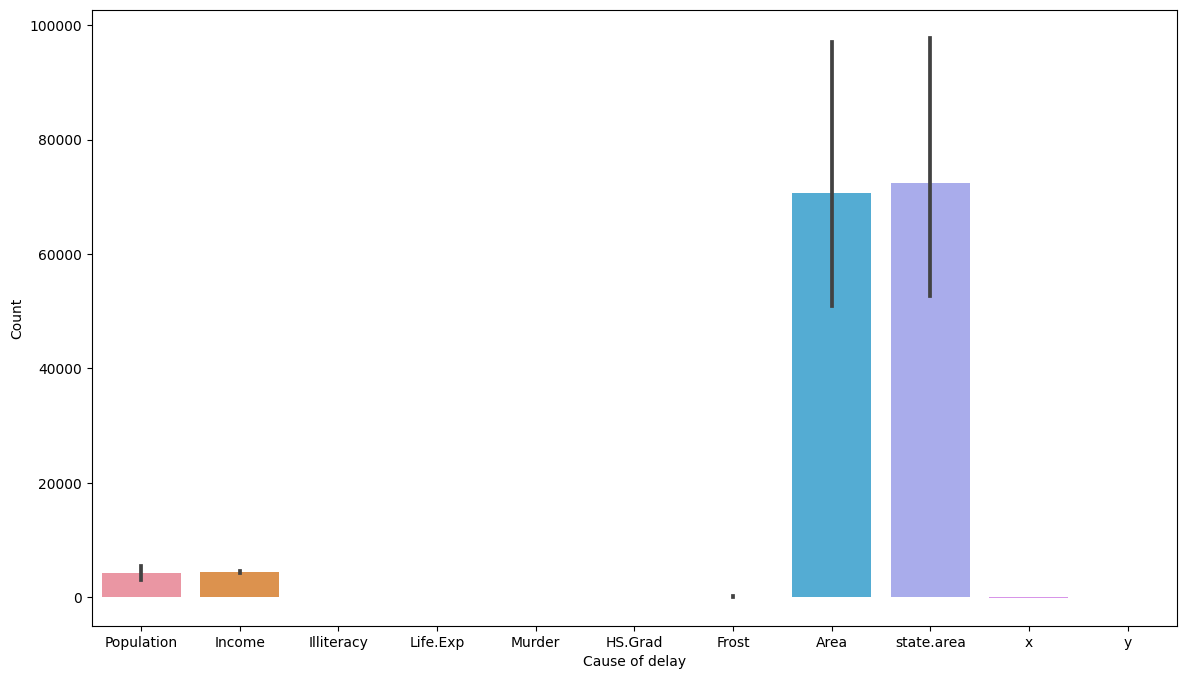

In [28]:
plt.figure(figsize=(14, 8))
sns.barplot(data=dfw_melted, x='index', y='Count')

# Set the labels
plt.xlabel('Cause of delay')
plt.ylabel('Count')

## Correlation Coefficient
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).

## Correlation Matrix
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

## Scatterplot
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.


In [33]:
df.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


<Axes: >

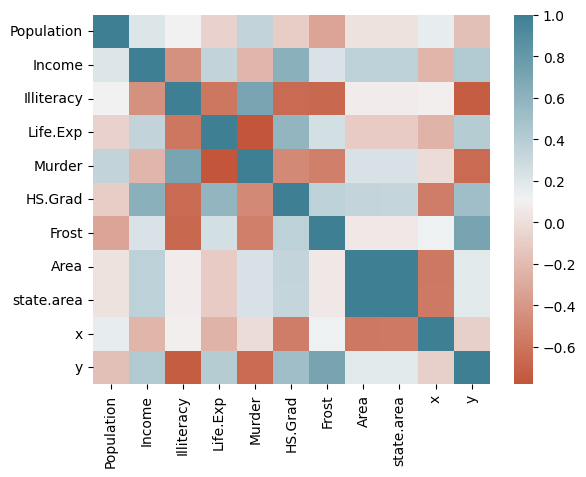

In [35]:

# Create a heatmap of the correlation matrix
sns.heatmap(
    df[m].corr(),                          # Compute correlation matrix
    cmap=sns.diverging_palette(20, 220, as_cmap=True)  # Diverging color palette
)



## Contingency Table
A tally of counts between two or more categorical variables.

## Hexagonal Binning
A plot of two numeric variables with the records binned into hexagons.

## Contour Plot
A plot showing the density of two numeric variables like a topographical map.

## Violin Plot
Similar to a boxplot but showing the density estimate.


In [37]:
! pip install sweetviz


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                                             |          | [  0%]   00:00 -> (? left)


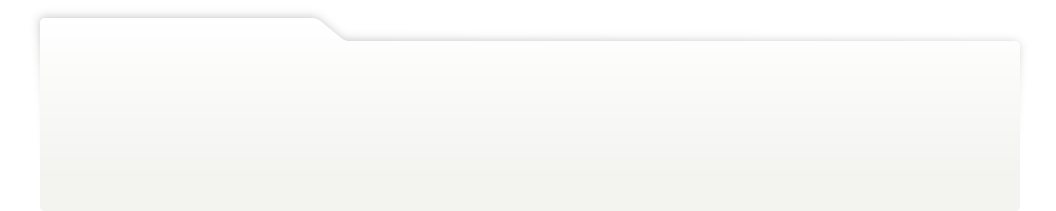
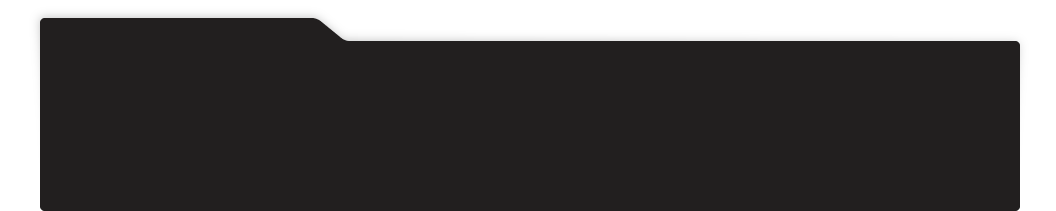
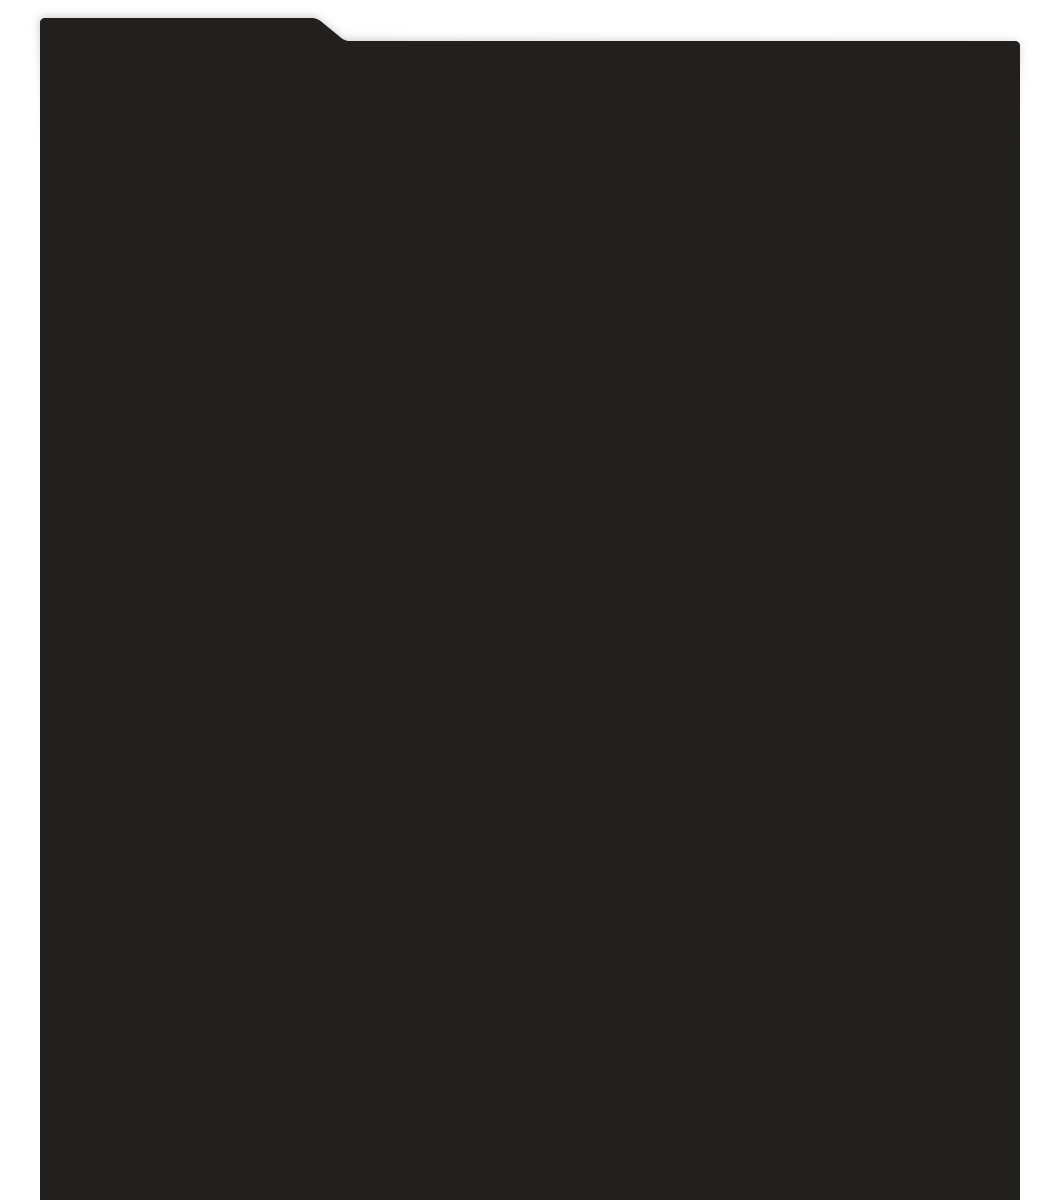
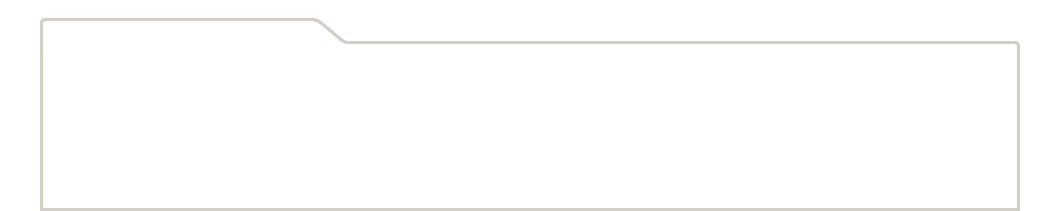
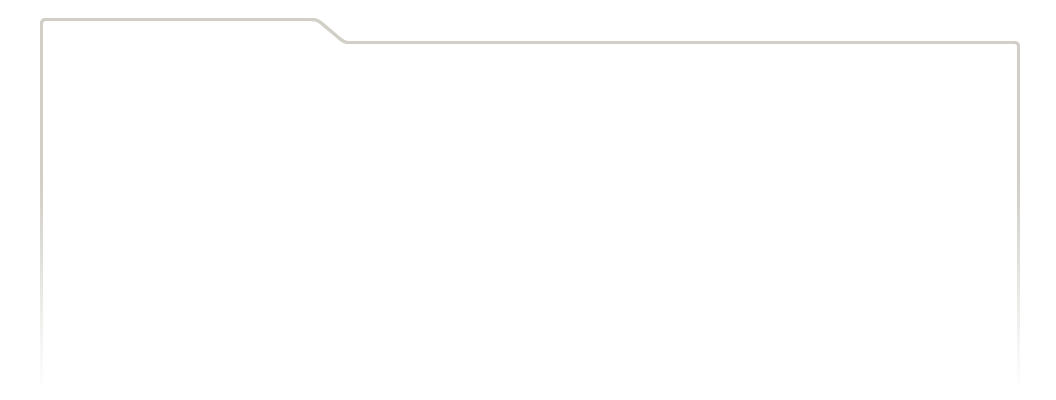
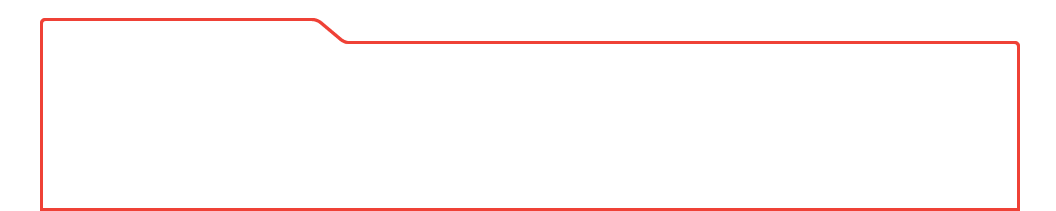
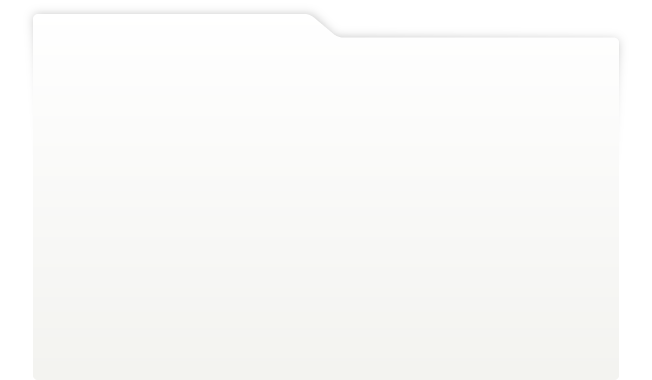
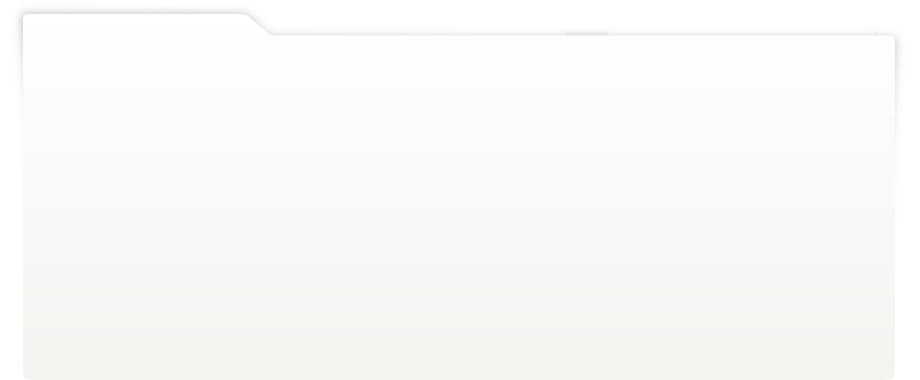
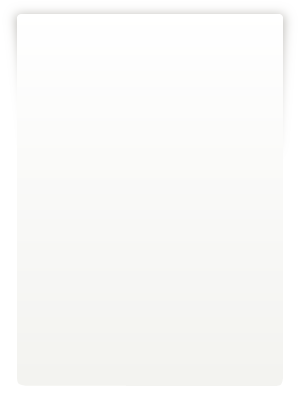
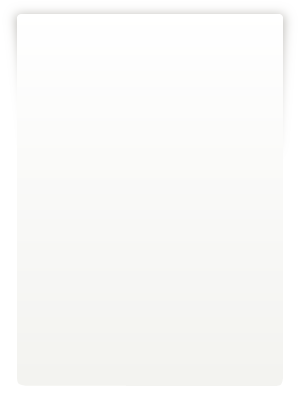
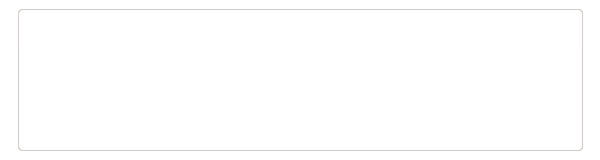
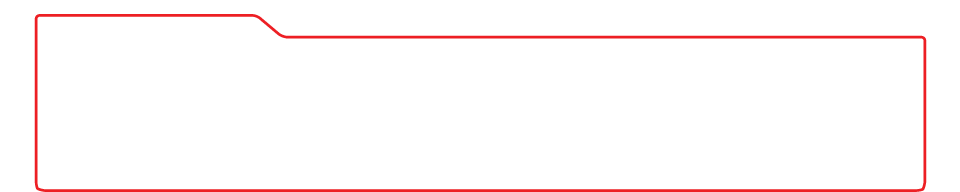
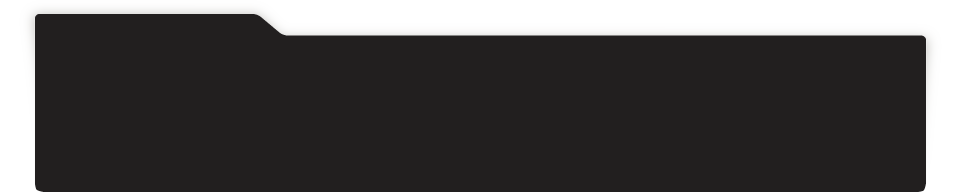
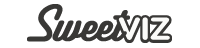
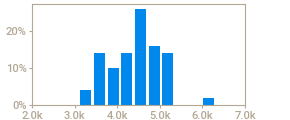
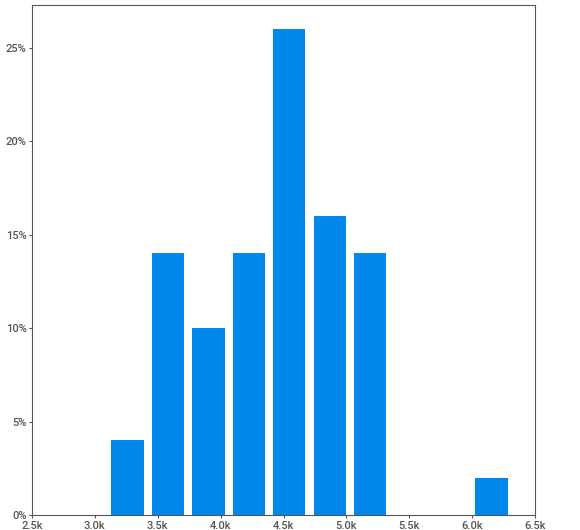
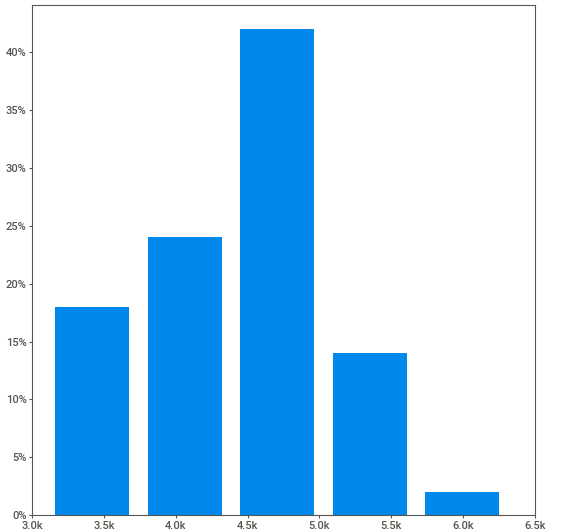
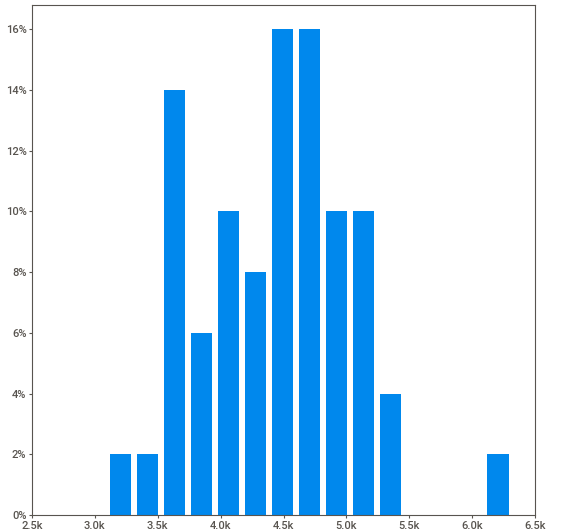
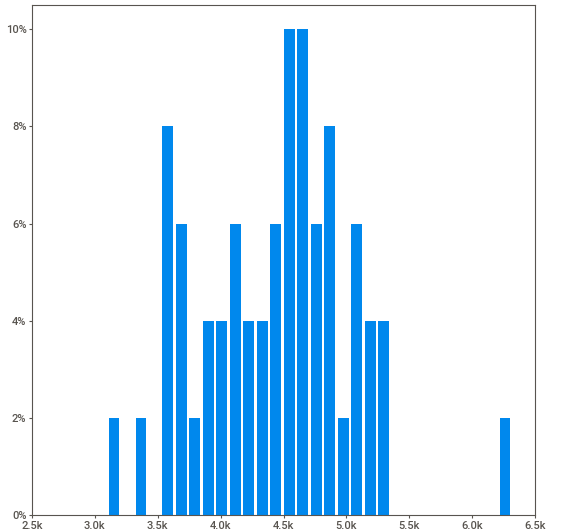
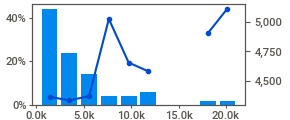
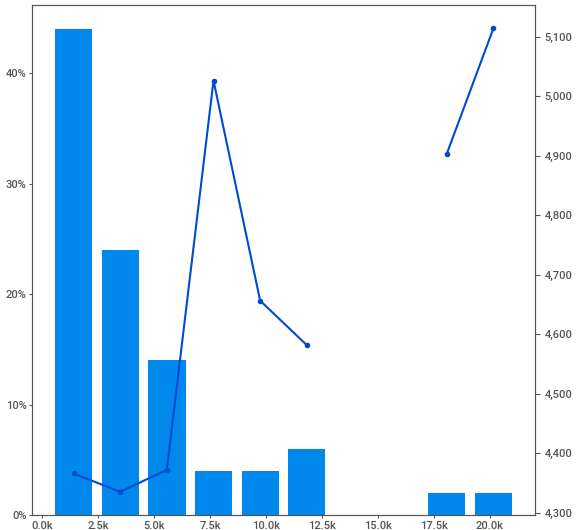
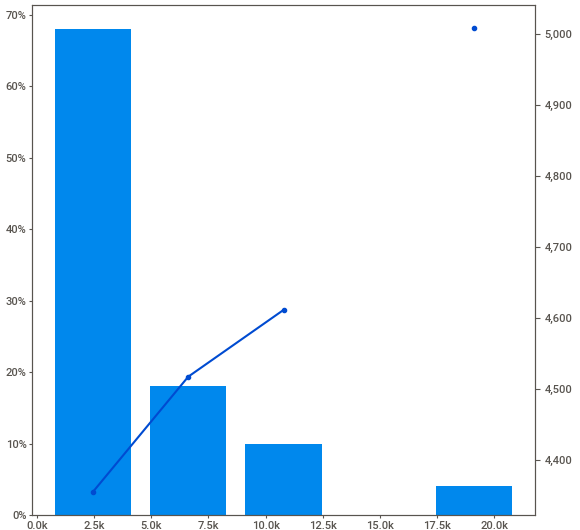
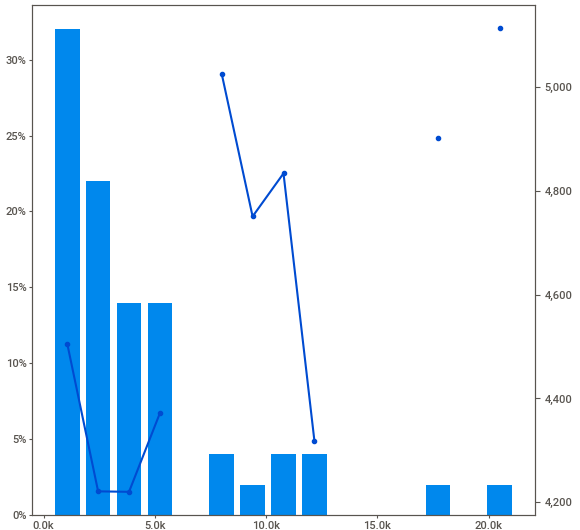
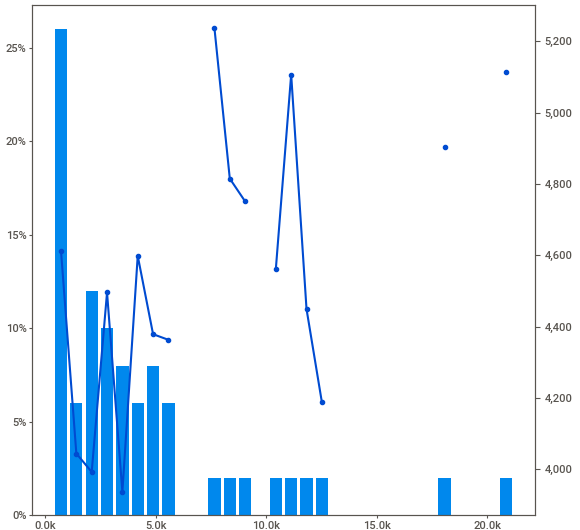
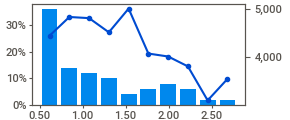
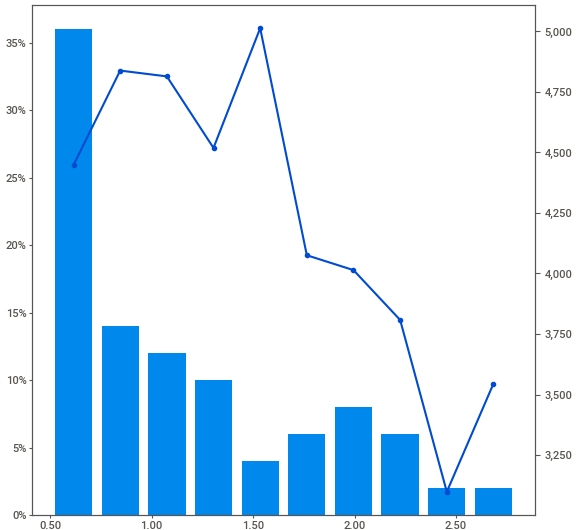
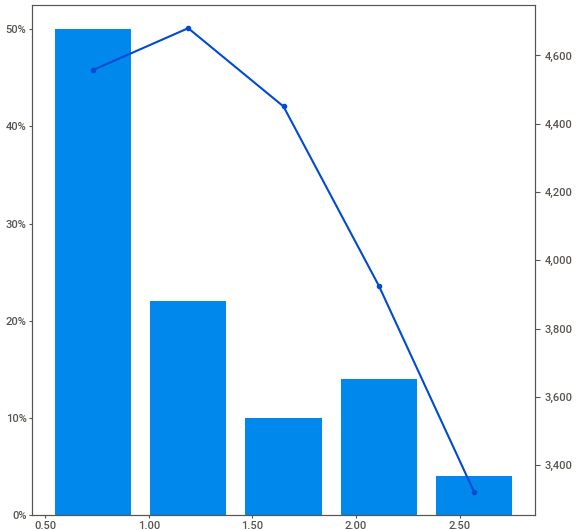
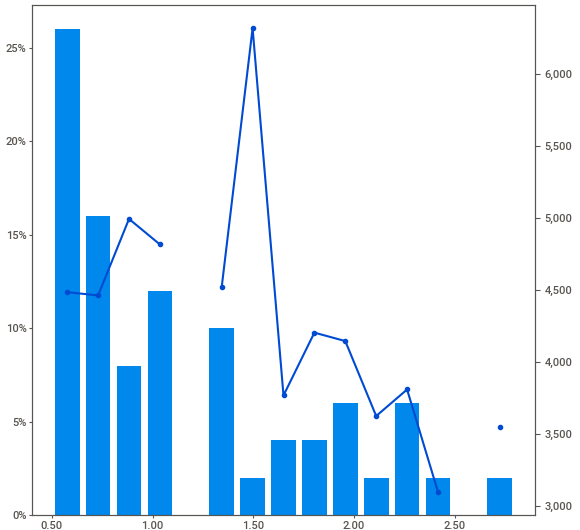
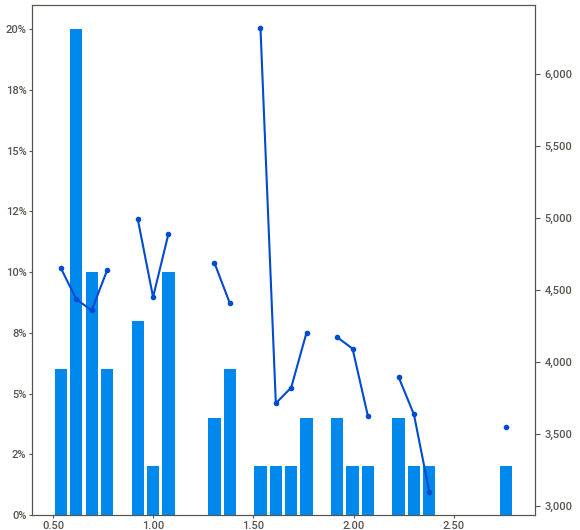
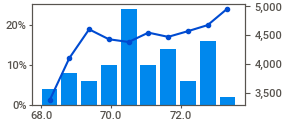
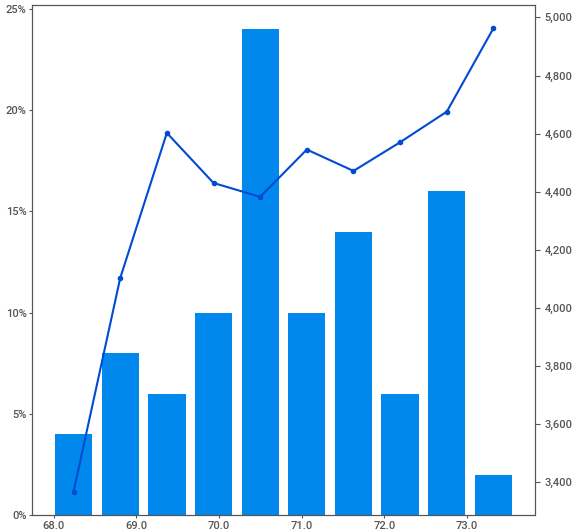
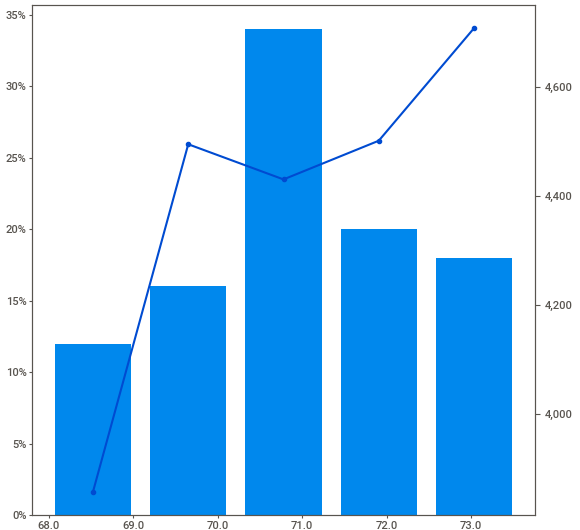
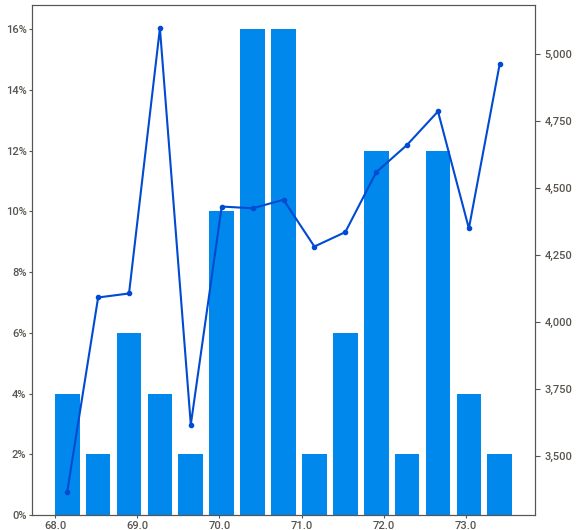
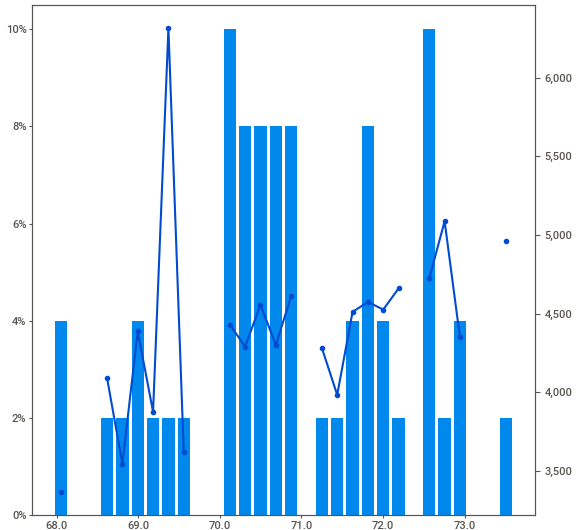
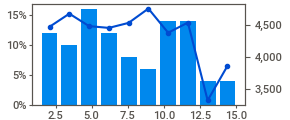
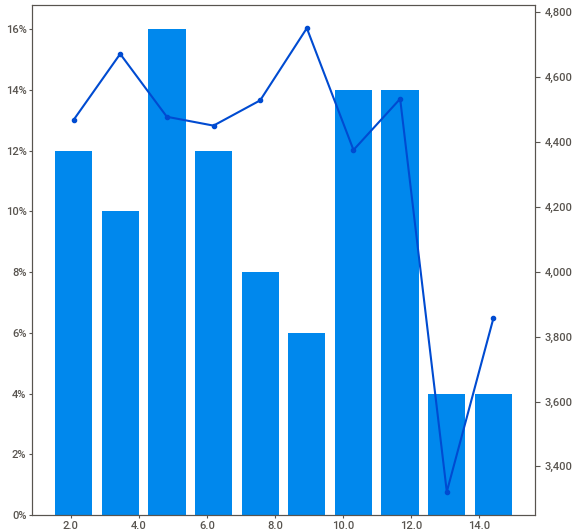
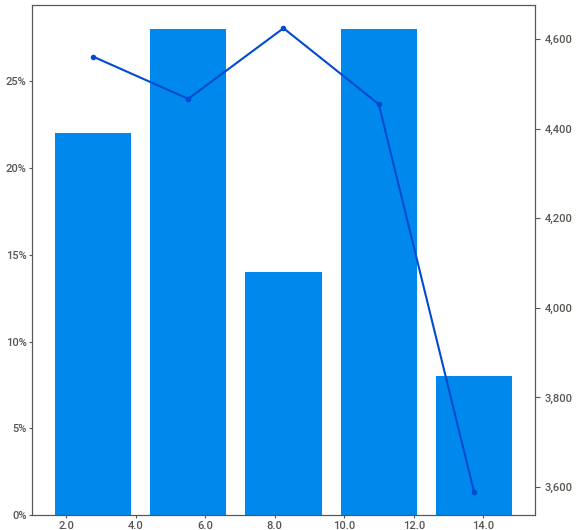
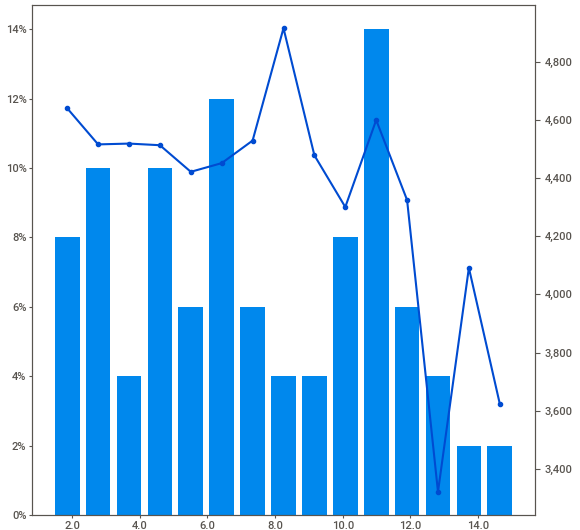
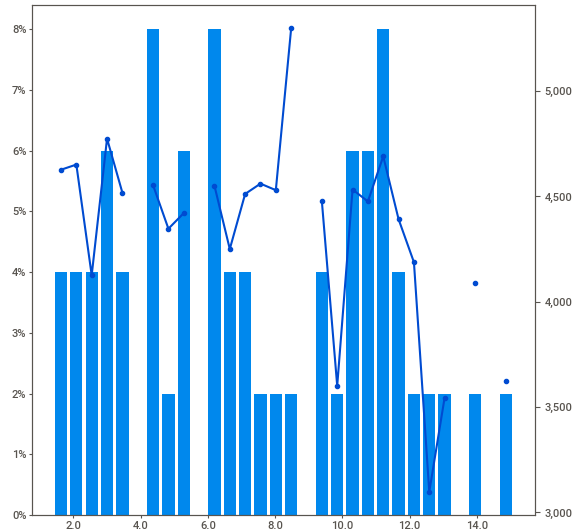
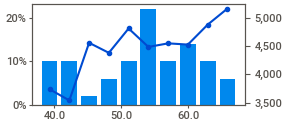
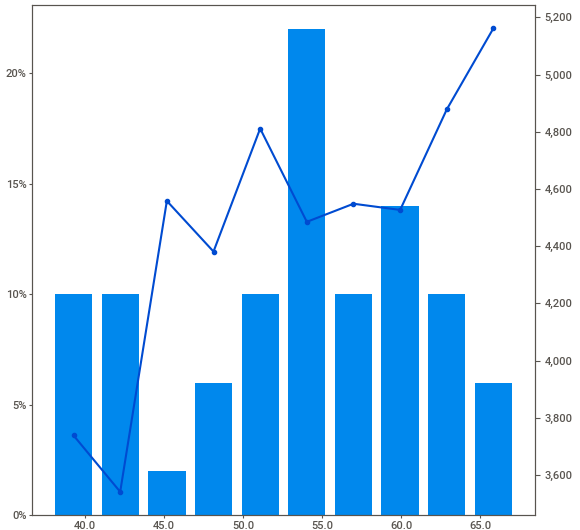
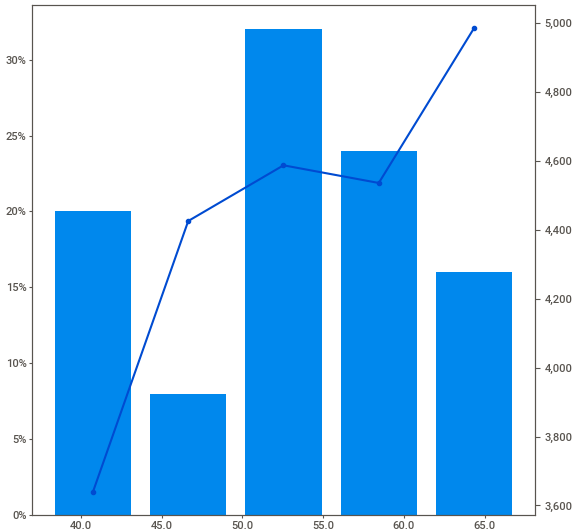
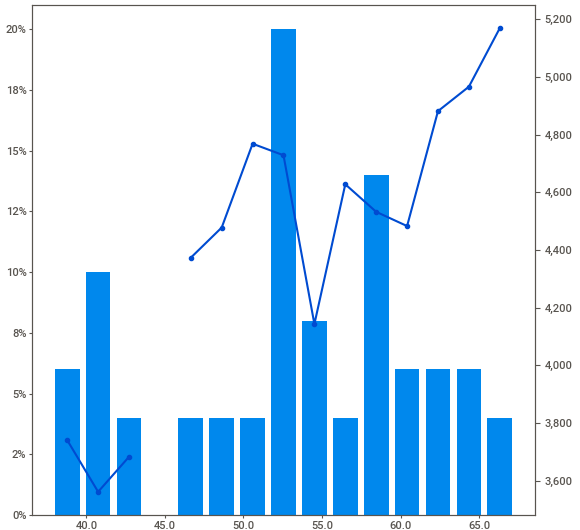
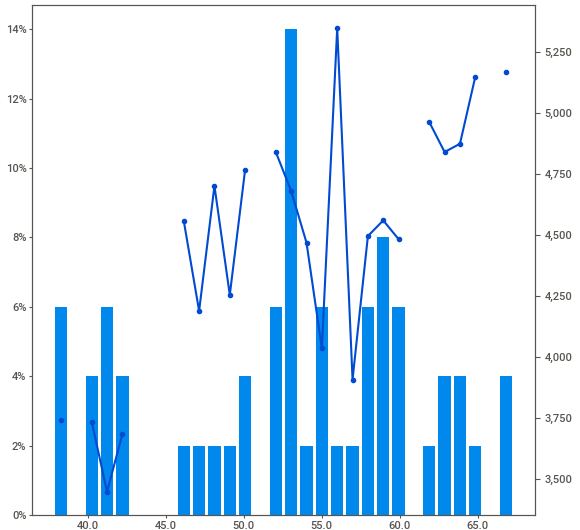
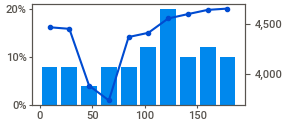
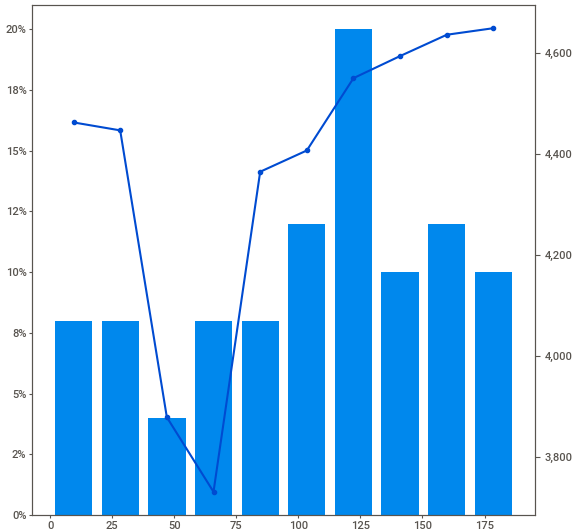
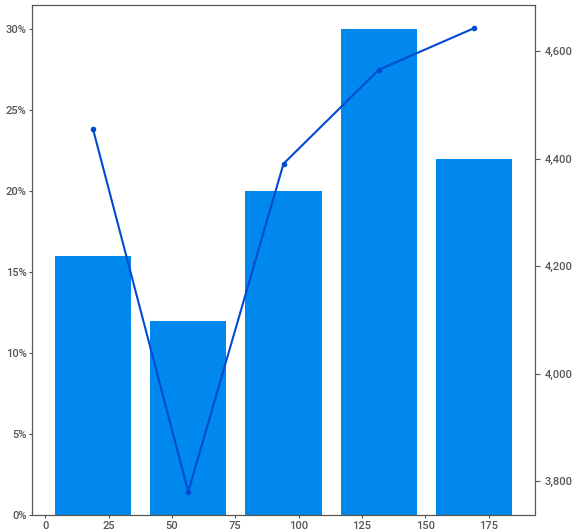
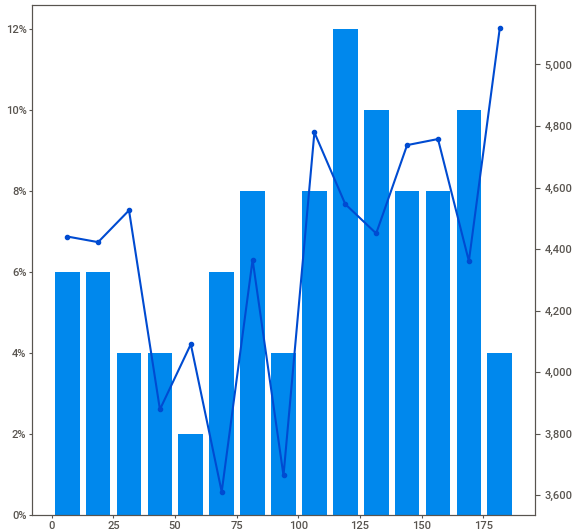
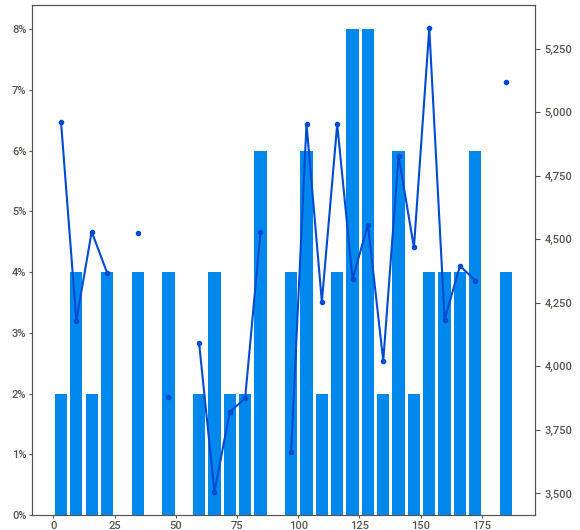
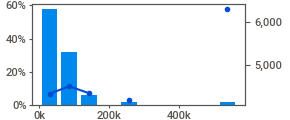
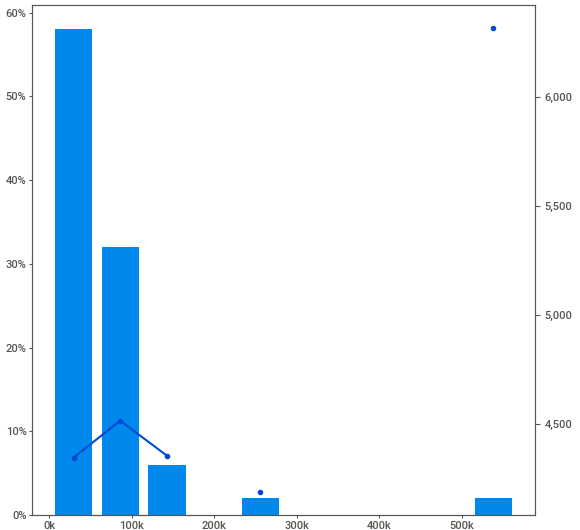
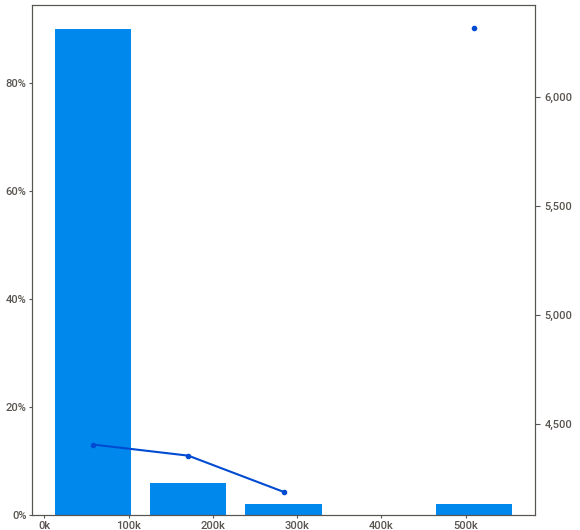
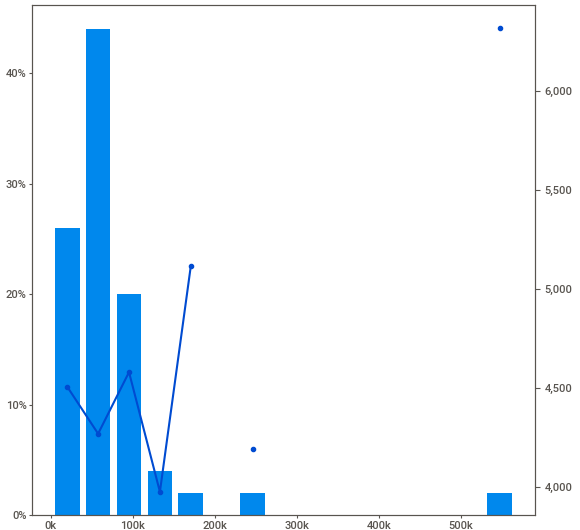
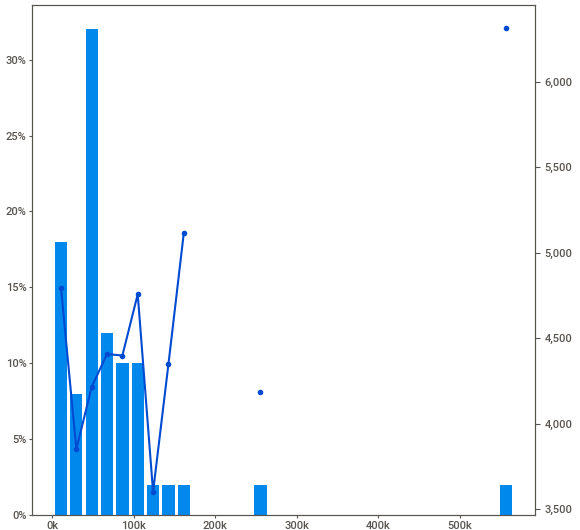
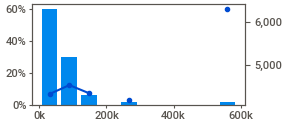
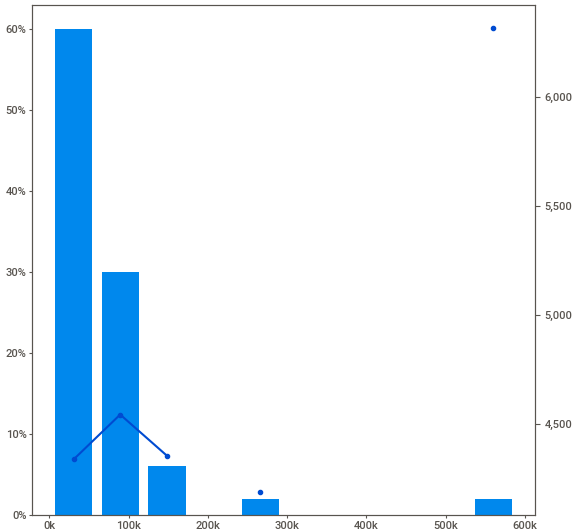
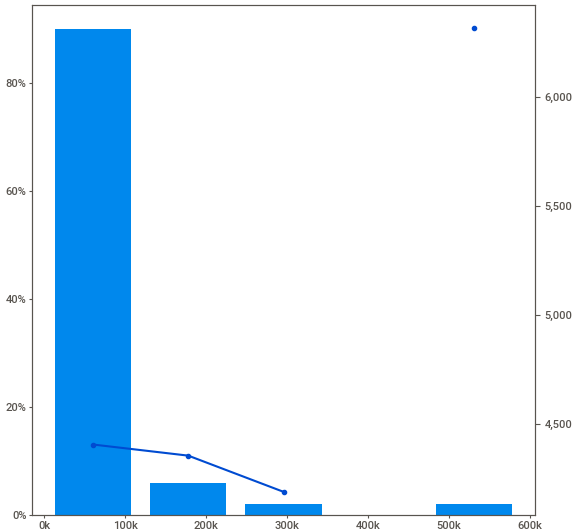
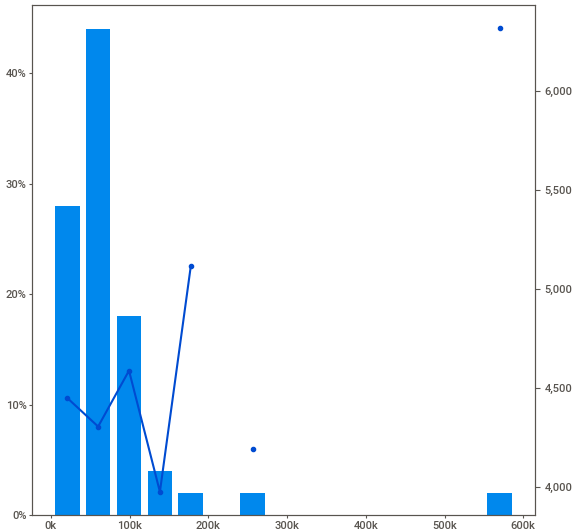
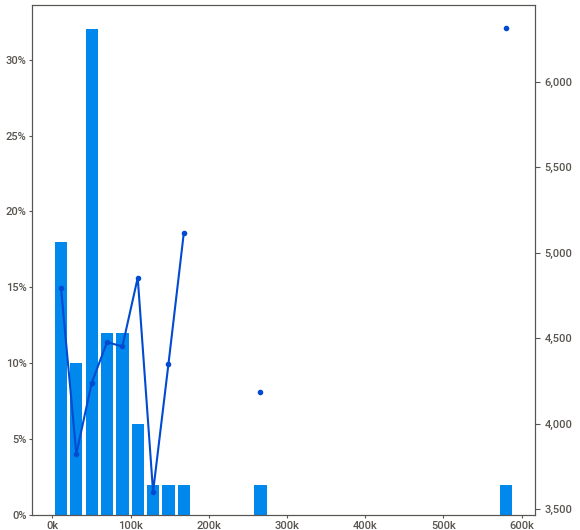
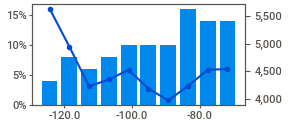
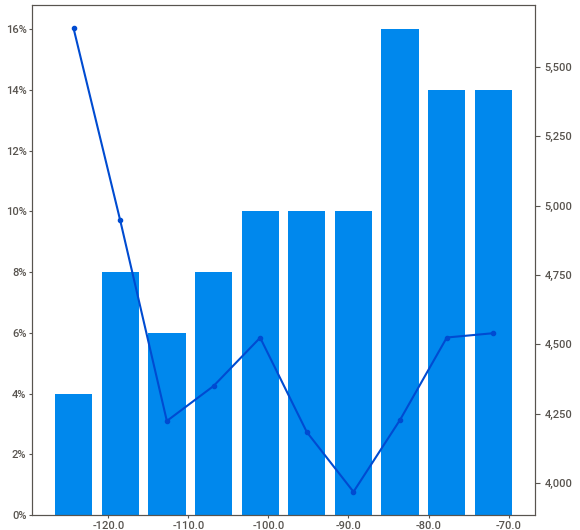
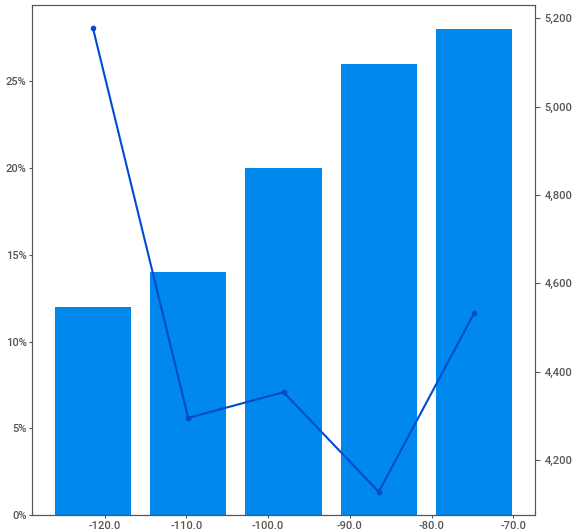
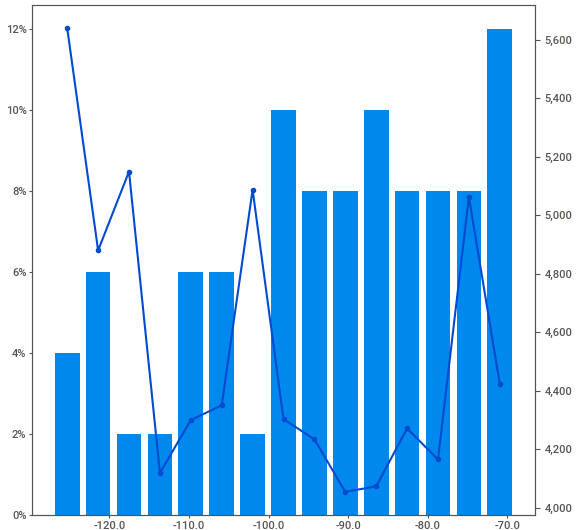
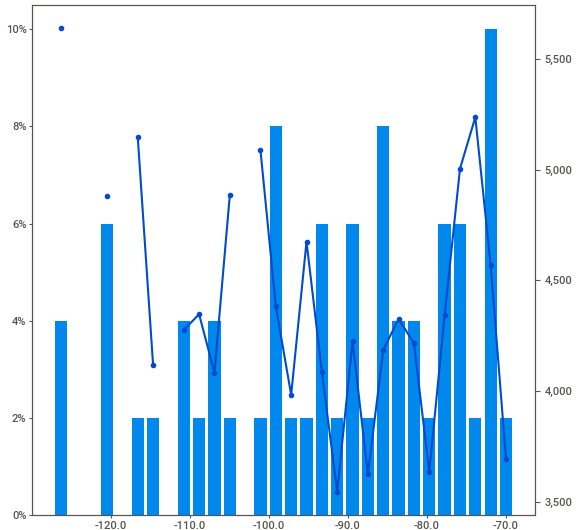
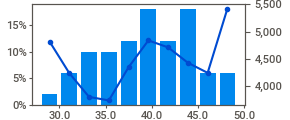
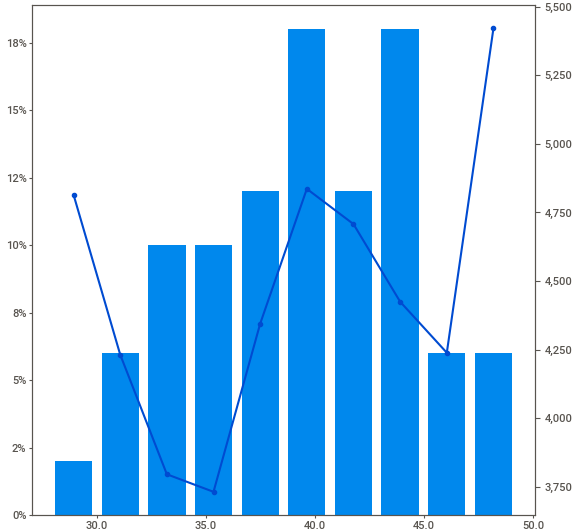
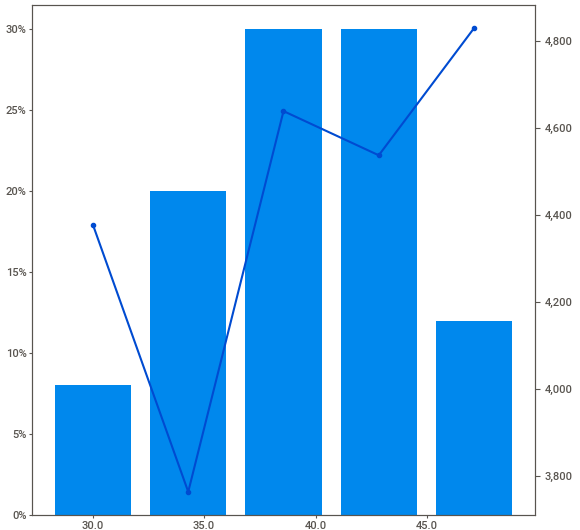
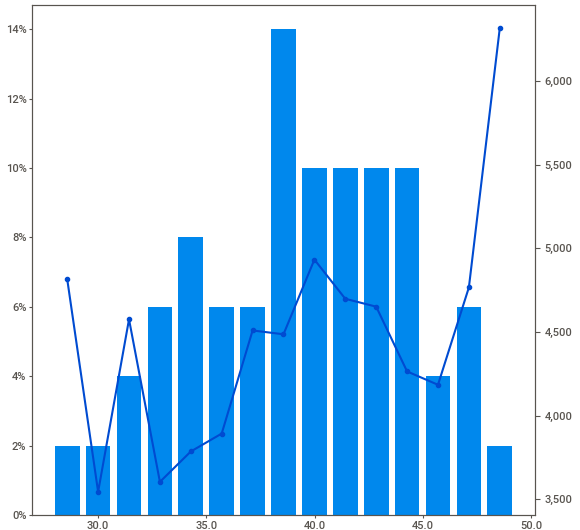
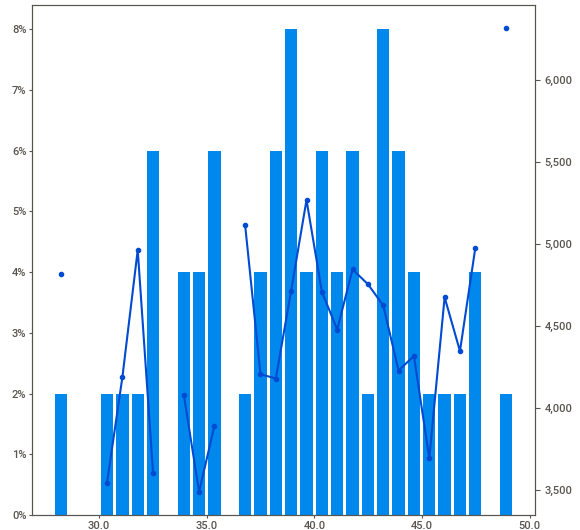
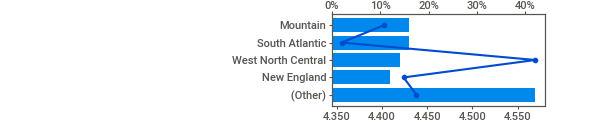
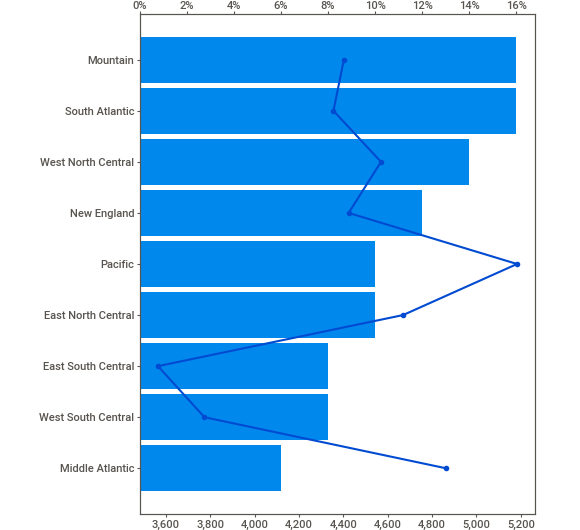
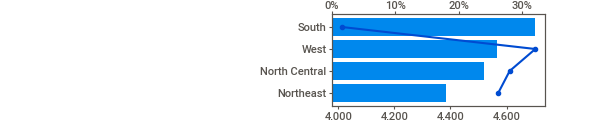
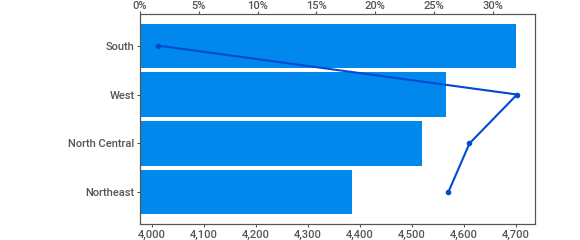
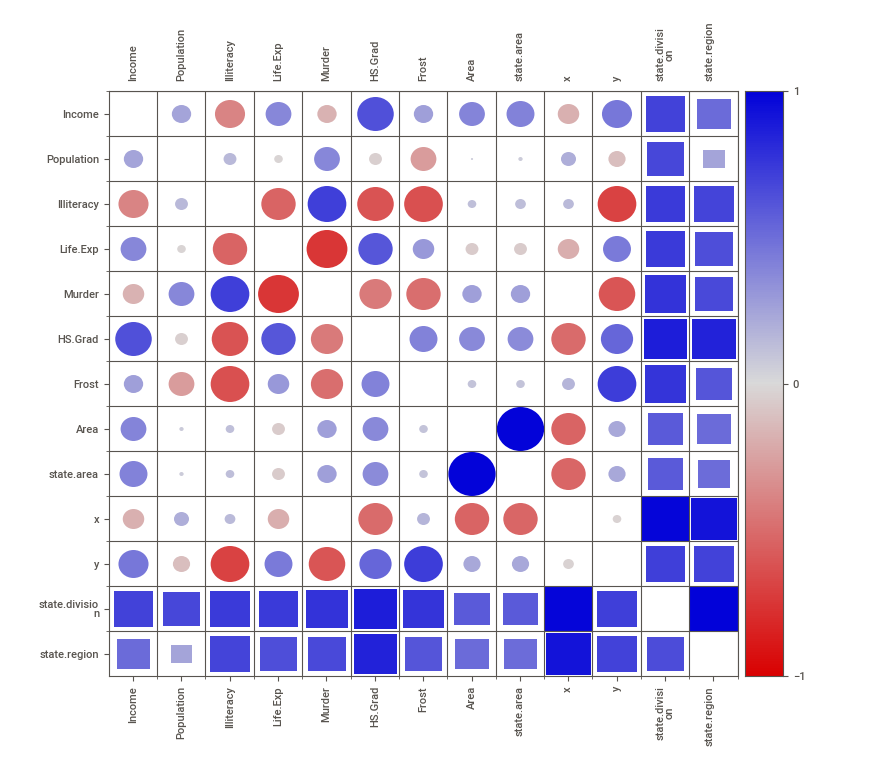
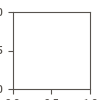

In [39]:
import sweetviz as sv
report=sv.DataframeReport(df,target_feature_name='Income')
report.show_notebook()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

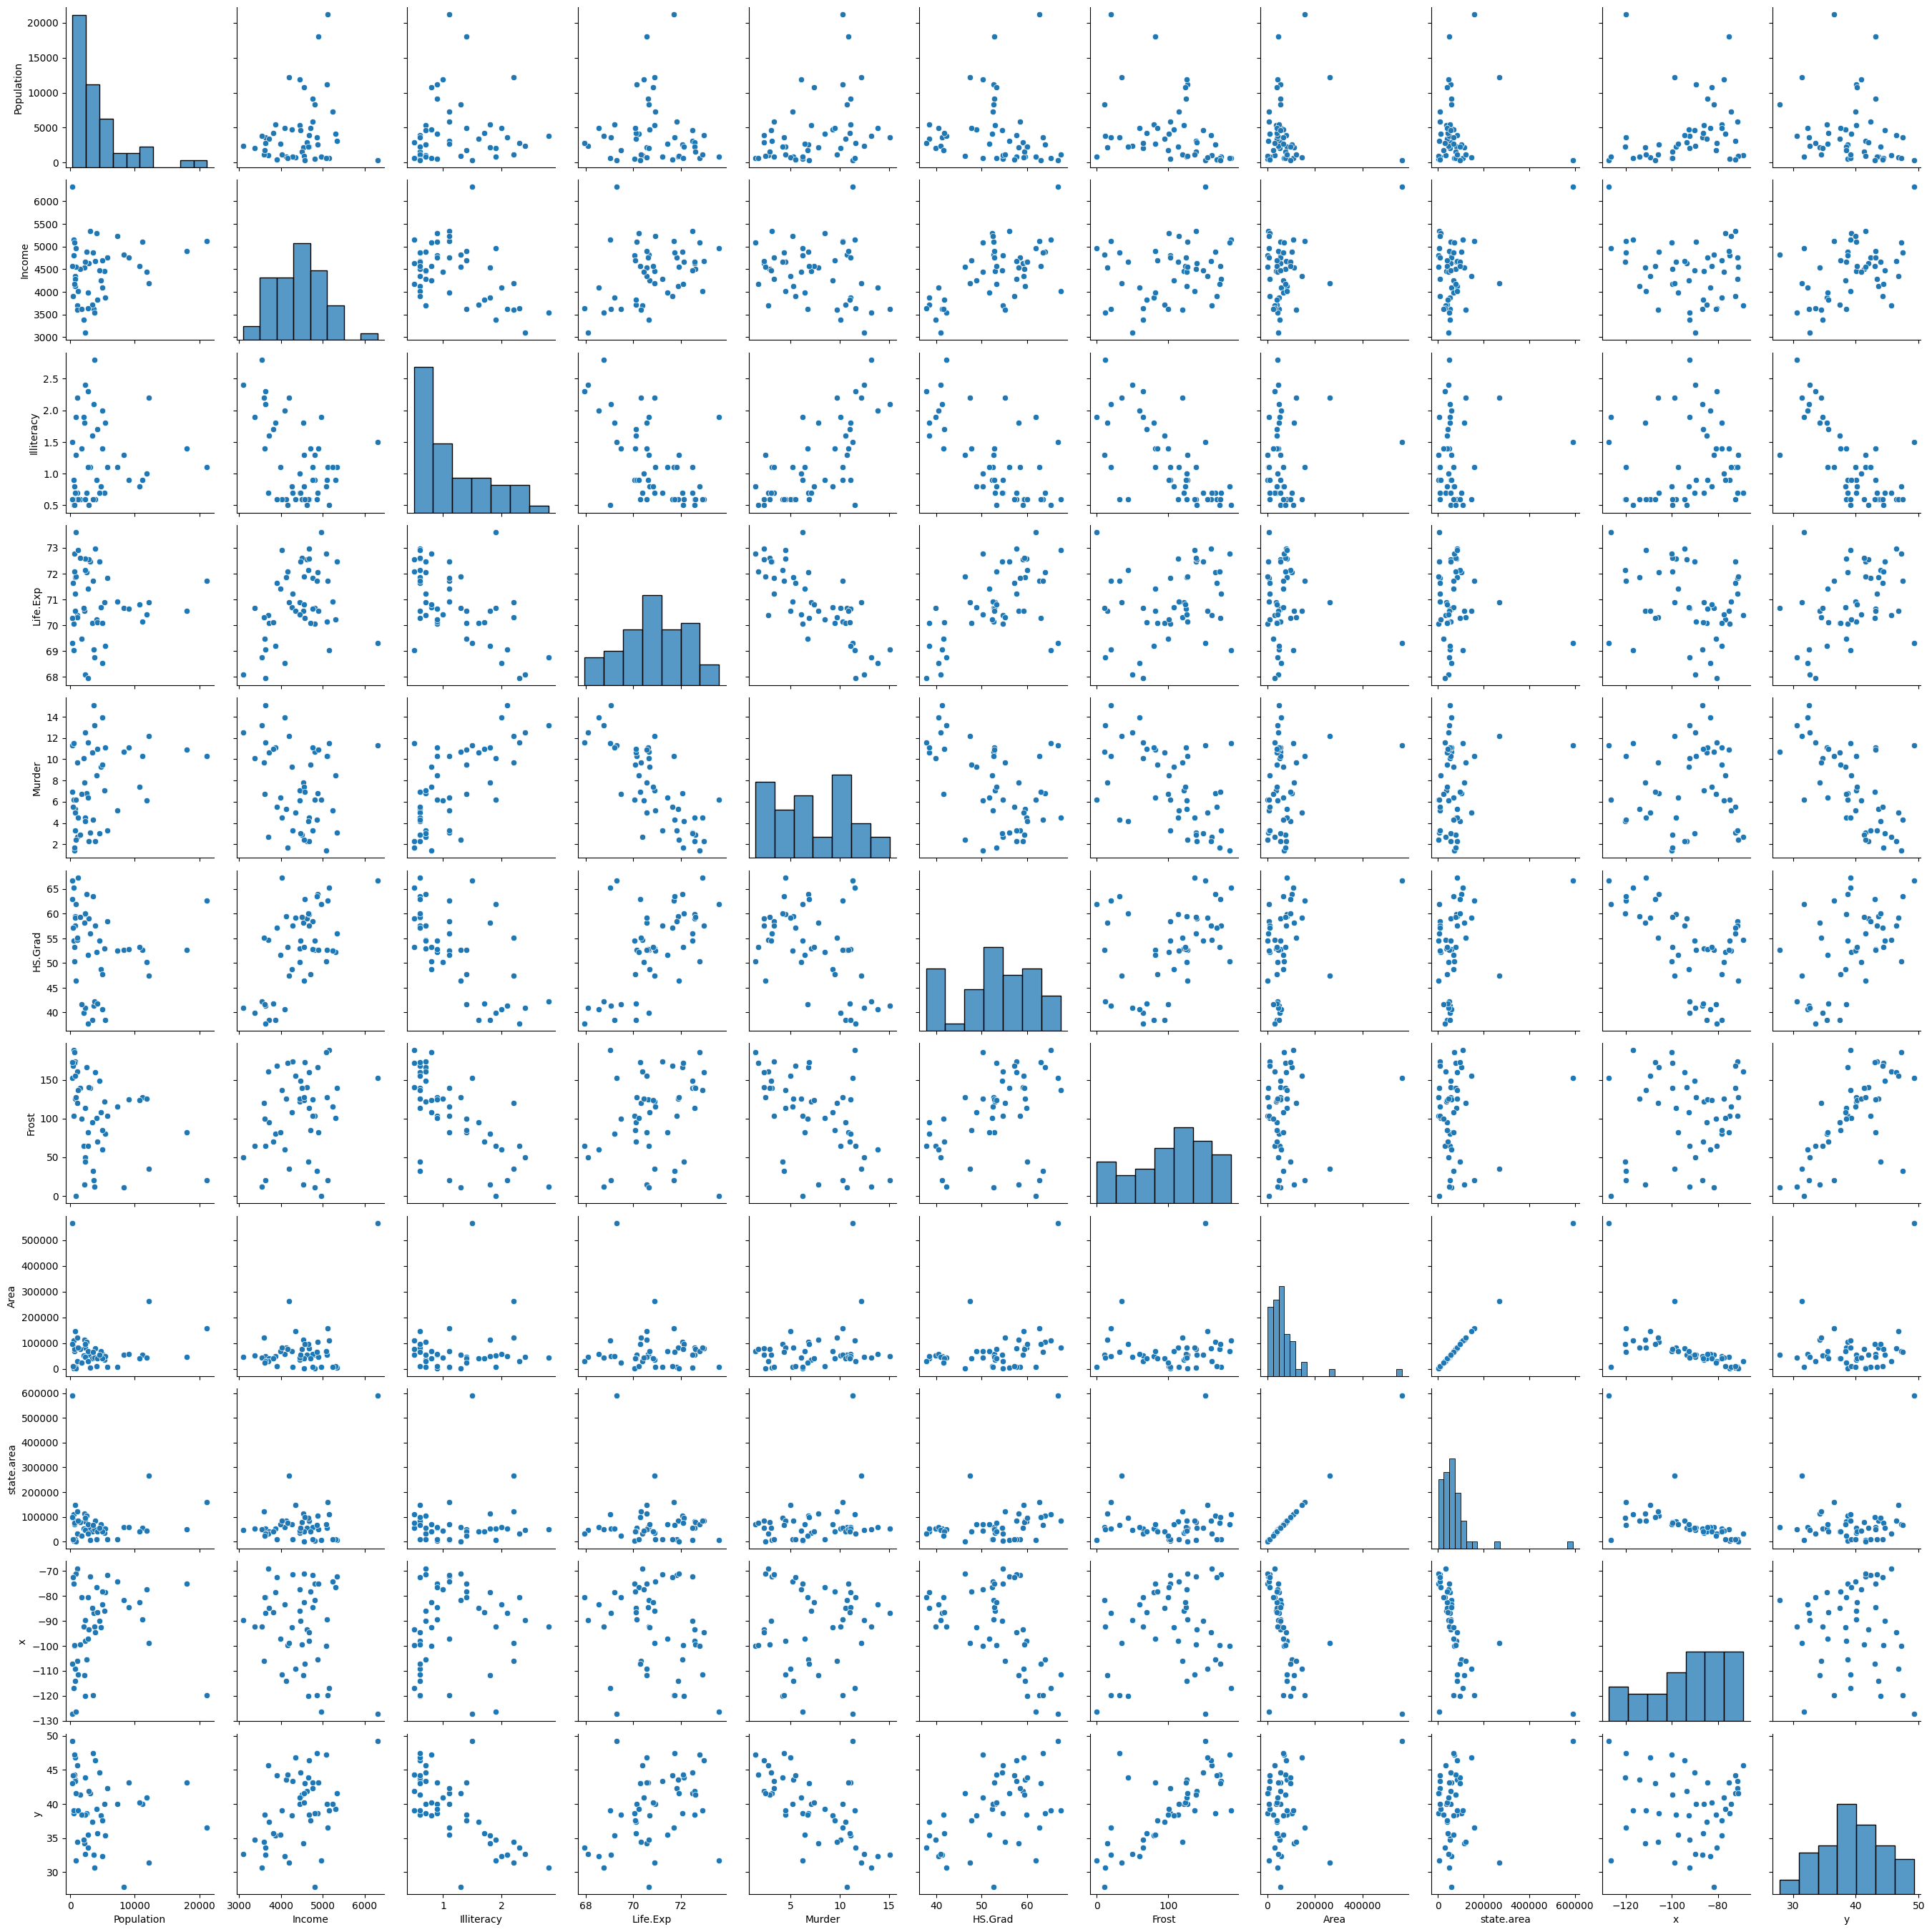

In [36]:
sns.pairplot(df)
plt.show()